In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      64376 non-null  int64  
 1   TENURE          64376 non-null  object 
 2   MONTANT         64376 non-null  float64
 3   FREQUENCE_RECH  64376 non-null  float64
 4   REVENUE         64376 non-null  float64
 5   ARPU_SEGMENT    64376 non-null  float64
 6   FREQUENCE       64376 non-null  float64
 7   DATA_VOLUME     64376 non-null  float64
 8   ON_NET          64376 non-null  float64
 9   MRG             64376 non-null  object 
 10  REGULARITY      64376 non-null  int64  
 11  CHURN           64376 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64371    False
64372    False
64373    False
64374    False
64375    False
Length: 64376, dtype: bool

In [8]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
cat = df.select_dtypes(exclude ='number')
num = df.select_dtypes(include= 'number')

print('Numerical Data')
display(num.head())
print('Categorical Data')
display(cat.head())

Numerical Data


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


Categorical Data


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


In [10]:
cols_to_scale = []
for i in num.columns:
  if df[i].describe()[2] > 1500:
    cols_to_scale.append(i)

cols_to_scale

['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'DATA_VOLUME']

In [11]:
# SCALE THE NUMERICAL COLUMNS
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in cols_to_scale:
    scale = StandardScaler()
    df[i] = scale.fit_transform(df[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler'] = scale

scaled

{'MONTANT_scaler': StandardScaler(),
 'REVENUE_scaler': StandardScaler(),
 'ARPU_SEGMENT_scaler': StandardScaler(),
 'DATA_VOLUME_scaler': StandardScaler()}

In [12]:
from sklearn.preprocessing import LabelEncoder

encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in cat.columns: # ........................................................ Iterate through the new_categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    df[i] = encode.fit_transform(df[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusal
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'TENURE_encoder': LabelEncoder(), 'MRG_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

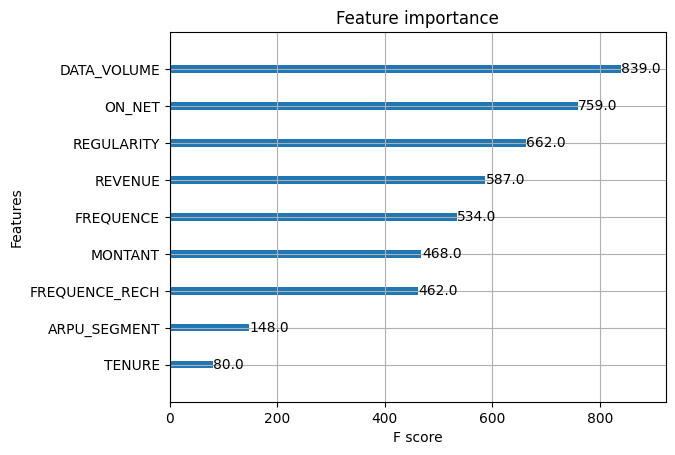

In [13]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()


x = df.drop('CHURN', axis = 1)
y = df.CHURN

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [14]:
sel_cols = ['DATA_VOLUME', 'ON_NET', 'REGULARITY', 'REVENUE', 'FREQUENCE', 'MONTANT',
            'FREQUENCE_RECH', 'ARPU_SEGMENT', 'CHURN']

ds = df[sel_cols]
ds.head()

,DATA_VOLUME,ON_NET,REGULARITY,REVENUE,FREQUENCE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,CHURN
0,-0.380804,1.0,32,-0.314144,8.0,-0.304123,4.0,-0.314002,1
1,0.138867,1.0,29,-0.461982,5.0,-0.525441,3.0,-0.461985,1
2,-0.070404,4.0,49,0.645935,38.0,0.706564,32.0,0.645934,1
3,-0.317423,8.0,1,-0.603890,2.0,-0.599214,2.0,-0.603892,1
4,-0.037885,28.0,21,-0.577707,3.0,-0.569705,3.0,-0.577854,1


In [19]:
from sklearn.model_selection import train_test_split

x = ds.drop('CHURN', axis = 1)
y = ds.CHURN

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (51500, 8)
Xtest: (12876, 8)
Ytrain: (51500,)
Ytest: (12876,)


In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = ds.drop('CHURN', axis = 1)
y = ds['CHURN']

xgb_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv,ytest))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6910
           1       0.79      0.78      0.79      5966

    accuracy                           0.81     12876
   macro avg       0.80      0.80      0.80     12876
weighted avg       0.80      0.81      0.80     12876



In [25]:
joblib.dump(xgb_model, open('ExpressorModel.pkl','wb'))